# <center> Задача классификации об открытии депозита на основе данных банка

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [72]:
data = pd.read_csv('C:/Users/l340/Desktop/Skillfactory/ML/Project ML/bank_fin.csv', sep = ';')

In [ ]:
data.info()

### Задание 2

In [ ]:
display(data)
data['education'].value_counts()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: count, dtype: int64

### Задание 3

В одну строку

In [18]:
#df['balance'] = data['balance'].apply(lambda x: x if [x]==[np.nan] else float((x.replace(' ', '')).replace(',', '.').split('$')[0]))

Через def

In [73]:
def process_balance(x):
    if pd.isna(x):
        return np.nan
    else:
        x_clean = x.replace(' ', '').replace(',', '.')
        x_split = x_clean.split('$')[0]
        return x_split
# Применение функции
data['balance'] = data['balance'].apply(process_balance)
data['balance'] = data['balance'].astype(float)

In [20]:
round(data['balance'].mean(),3)

np.float64(1529.129)

### Задание 4

In [ ]:
data['balance'] = data['balance'].fillna(data['balance'].median())
round(data['balance'].mean(),3)

np.float64(1526.936)

### Задание 5

In [75]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
data['job'] = data['job'].apply(lambda x: x if x!='unknown' else data['job'].mode()[0])
data['education'] = data['education'].apply(lambda x: x if x!='unknown' else data['education'].mode()[0])

In [23]:
data['education'].value_counts()

education
secondary    5973
tertiary     3689
primary      1500
Name: count, dtype: int64

In [24]:
mask=(data['job']=='management') & (data['education']=='secondary')
round(data[mask]['balance'].mean(),3)

np.float64(1598.883)

### Задание 6

In [76]:
# удалите все выбросы для признака balance
# ваш код
# Метод межквартильного размаха (метод Тьюки)

def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned,lower_bound,upper_bound

outliers, cleaned,a,b = outliers_iqr(data, 'balance')
print(a,b)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

-2241.0 4063.0
Число выбросов по методу Тьюки: 1057
Результирующее число записей: 10105


In [77]:
data=cleaned

## Часть 2:  Разведывательный анализ

### Задание 1

In [27]:
data['deposit'].value_counts()

deposit
no     5424
yes    4681
Name: count, dtype: int64

Text(0.5, 1.0, 'Распределение частоты для открывших депозит и для тех, кто его не открыл')

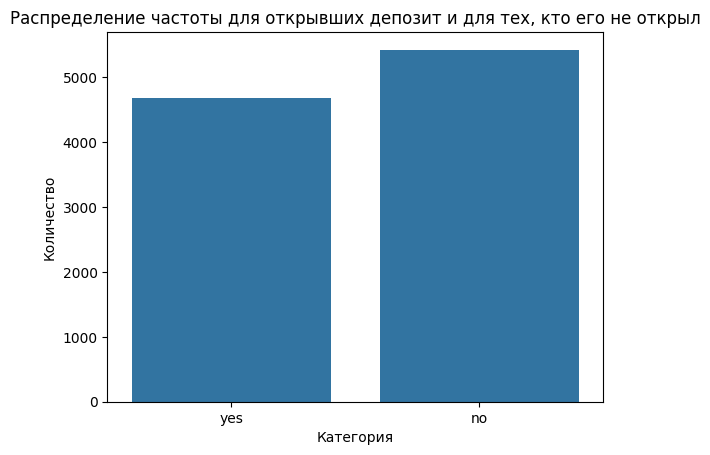

In [28]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код

sns.countplot(x='deposit',data=data)
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Распределение частоты для открывших депозит и для тех, кто его не открыл')



### Задания 2 и 3

In [29]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код
data.describe()# по умолчанию числовые


,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


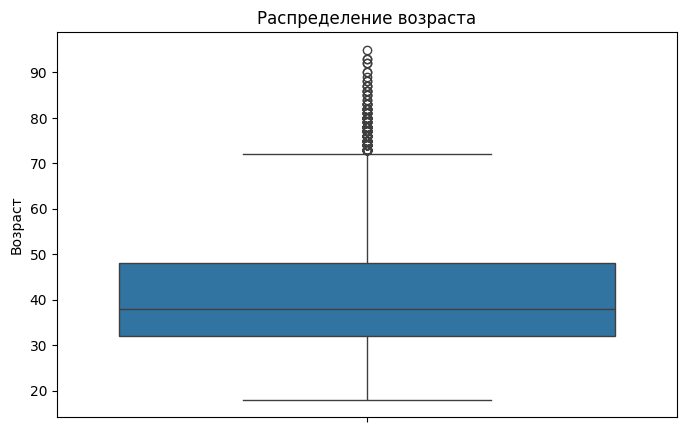

In [30]:
fig = plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    y='age'
    )
plt.title('Распределение возраста');
plt.ylabel('Возраст');


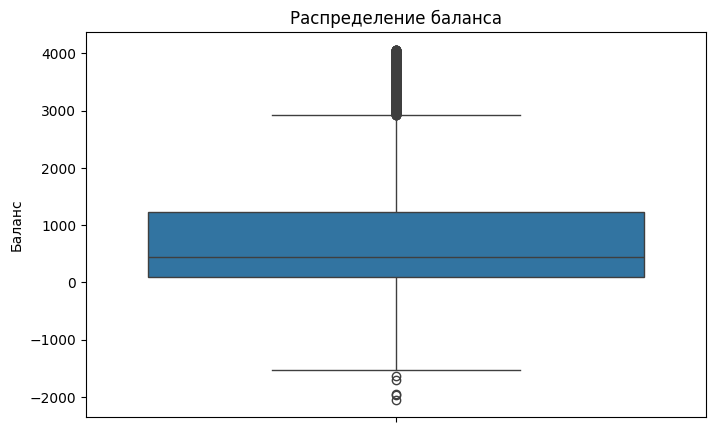

In [31]:
fig = plt.figure(figsize=(8, 5))
sns.boxplot(
    data=data,
    y='balance'
    )
plt.title('Распределение баланса');
plt.ylabel('Баланс');

### Задания 4 и 5

In [32]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
data.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


### Задание 6

In [33]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
data['poutcome'].value_counts()

poutcome
unknown    7570
failure    1109
success     945
other       481
Name: count, dtype: int64

In [34]:
data['deposit'].value_counts()

deposit
no     5424
yes    4681
Name: count, dtype: int64

### Задание 7

In [78]:
data['deposit']=data['deposit'].apply(lambda x: 0 if x=='no' else 1)
data['deposit'].value_counts()

deposit
0    5424
1    4681
Name: count, dtype: int64

In [79]:
# Выполняем группировку один раз
grouped = data.groupby('month')['deposit']

# Общее число заявок по месяцам
total_requests = grouped.count()

# Число успешных депозитов по месяцам
successful_deposits = grouped.sum()

# Расчет процента отказов
percent_failure = round(
    (total_requests - successful_deposits) / total_requests * 100
)

# Сортируем по убыванию
percent_failure = percent_failure.sort_values(ascending=False)

print(f'В {percent_failure.index[0]} месяце больше всего отказывались от открытия депозита.')

В may месяце больше всего отказывались от открытия депозита.


In [80]:
import plotly
import plotly.express as px
fig = px.bar(data.pivot_table(# можно без values, чтобы просто посчитать кол-во строк
    index='month',    
    columns='deposit',
    aggfunc='size',# считает количество строк
    fill_value=0
).sort_index(ascending=False).reset_index(), x='month', y=[0,1],
             orientation='v',
             text_auto=True,
             barmode='group',
             title='Открытие депозитов(deposit) в разрезе месяца контакта с клиентом(month)')
fig.show()

In [82]:
# Группируем по 'month'
grouped = data.groupby('month')

# Создаем список для хранения результатов
lst = []

# Проходим по группам
for month_name, group in grouped:
    total_cases = len(group) # group — это подтаблица (под DataFrame), содержащая все строки из исходных данных, относящиеся к этому месяцу.
    failure_cases = len(group[group['deposit'] == '0'])
    ratio = failure_cases / total_cases if total_cases > 0 else 0
    lst.append({'month': month_name, 'failure_ratio': ratio})

df_ratios = pd.DataFrame(lst)

print(df_ratios)

   month  failure_ratio
0    apr            0.0
1    aug            0.0
2    dec            0.0
3    feb            0.0
4    jan            0.0
5    jul            0.0
6    jun            0.0
7    mar            0.0
8    may            0.0
9    nov            0.0
10   oct            0.0
11   sep            0.0


### Задание 8

In [83]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def get_age(x):
    if x<30:
        return '<30'
    elif 30<=x<=40:
        return '30-40'
    elif 40<=x<=50:
        return '40-50'
    elif 50<=x<=60:
        return '50-60'
    elif x>60:
        return '60+'

data['age_group']=data['age'].apply(get_age)
data['age_group'].value_counts()

age_group
30-40    4257
40-50    2255
50-60    1625
<30      1455
60+       513
Name: count, dtype: int64

In [41]:
ct=pd.crosstab(data['age_group'],data['deposit'])


<Axes: xlabel='deposit', ylabel='age_group'>

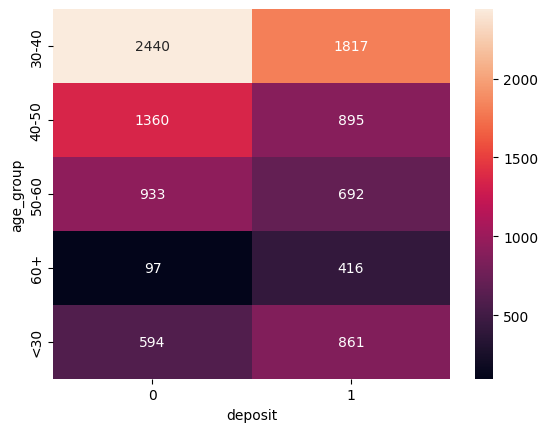

In [42]:
sns.heatmap(ct,annot=True,fmt='d')

### Задания 9 и 10

<Axes: xlabel='deposit', ylabel='marital'>

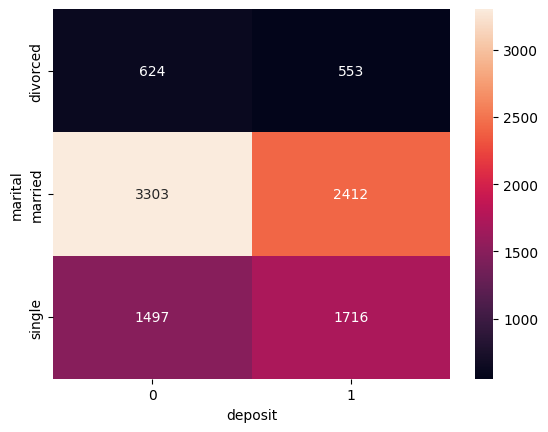

In [43]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
ct=pd.crosstab(data['marital'],data['deposit'])
sns.heatmap(ct,annot=True,fmt='d')

<Axes: xlabel='deposit', ylabel='education'>

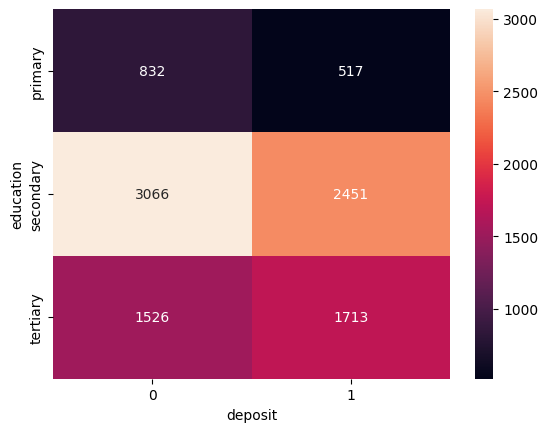

In [44]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
ct=pd.crosstab(data['education'],data['deposit'])
sns.heatmap(ct,annot=True,fmt='d')

<Axes: xlabel='deposit', ylabel='job'>

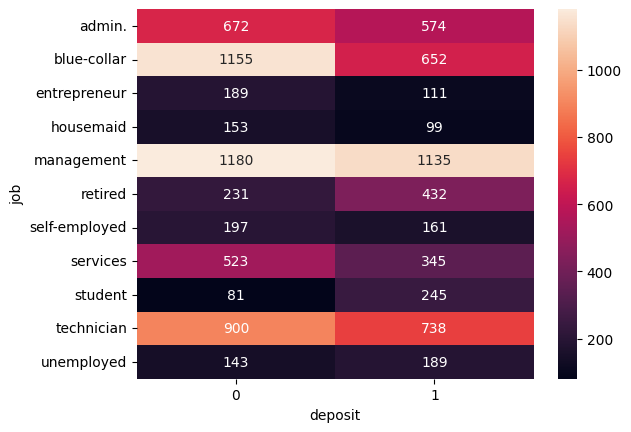

In [45]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
ct=pd.crosstab(data['job'],data['deposit'])
sns.heatmap(ct,annot=True,fmt='d')

### Задание 11

<Axes: xlabel='education', ylabel='marital'>

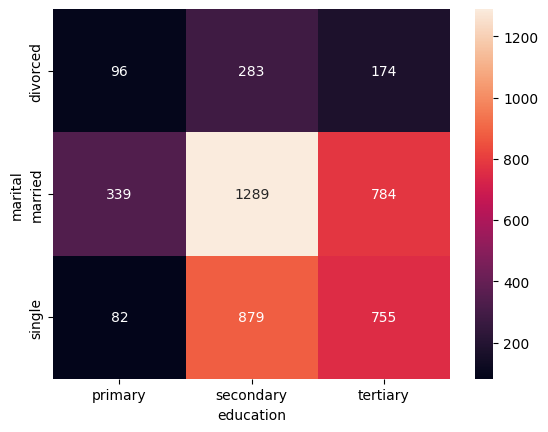

In [46]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
df=data[data['deposit']==1]
pvt=df.pivot_table(# можно без values, чтобы просто посчитать кол-во строк
    values='deposit',
    index='marital',    
    columns='education',
    aggfunc='count',
    fill_value=0
)
sns.heatmap(pvt,annot=True,fmt='d')

## Часть 3: преобразование данных

### Задание 1

In [84]:
# преобразуйте уровни образования
le=LabelEncoder()
data['education_cod']=le.fit_transform(data['education'])
data['education_cod'].sum()

np.int64(11995)

In [85]:
le=LabelEncoder()
data['age_cod']=le.fit_transform(data['age_group'])


### Задания 2 и 3

In [49]:
# преобразуйте бинарные переменные в представление из нулей и единиц
round(data['deposit'].std(),3) # стандартное отклонение

np.float64(0.499)

In [86]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
data['default']=le.fit_transform(data['default'])

In [87]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
data['housing']=le.fit_transform(data['housing'])

In [88]:
from sklearn.preprocessing  import LabelBinarizer
 
lb = LabelBinarizer()
data['loan']=le.fit_transform(data['loan'])

In [53]:
round(data['default'].mean()+data['housing'].mean()+data['loan'].mean(),3)

np.float64(0.635)

### Задание 4

In [89]:
# создайте дамми-переменные
data=pd.get_dummies(data,columns=['job',
'marital',
'contact',
'month',
'poutcome'])

data = data.drop(columns=['age', 'education', 'default', 'loan', 'housing','age_group'])

### Задания 5 и 6

In [ ]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
corr_matrix=data.corr(numeric_only=True)
deposit_matrix=corr_matrix['deposit'].drop('deposit')
deposit_matrix.sort_values(ascending=False)

### Задания 7 и 8

In [91]:
X = data.drop(['deposit'], axis=1)
y = data['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)
print(f'Размер тренировочной выборки:{X_train.shape}')
print(f'Размер тестовой выборки:{X_test.shape}')

Размер тренировочной выборки:(6770, 41)
Размер тестовой выборки:(3335, 41)


### Задание 9

In [59]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)
 
selector.get_feature_names_out()

array(['balance', 'duration', 'campaign', 'pdays', 'previous', 'age_cod',
       'job_student', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Задание 10

In [92]:
# нормализуйте данные с помощью minmaxsxaler
from sklearn.preprocessing import MinMaxScaler
scl=MinMaxScaler()
X_train_scl=scl.fit_transform(X_train)
X_train_scl=pd.DataFrame(X_train_scl,columns=X_train.columns)
X_test_scl=scl.fit_transform(X_test)
X_test_scl=pd.DataFrame(X_test_scl,columns=X_test.columns)

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [94]:
# обучите логистическую регрессию и рассчитайте метрики качества
from sklearn import linear_model 
#Создаем объект класса логистическая регрессия
log_reg_full = linear_model.LogisticRegression(random_state=42, max_iter=1000,solver='sag')
#Обучаем модель, минизируя logloss
log_reg_full.fit(X_train_scl, y_train)
#Делаем предсказание класса
y_pred = log_reg_full.predict(X_test_scl)
print('Test accuracy score: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))


Test accuracy score: 0.83


### Задания 2,3,4

In [101]:
# обучите решающие деревья, настройте максимальную глубину
from sklearn import tree
#Создаем объект класса логистическая регрессия
tree_reg = tree.DecisionTreeClassifier(random_state=42, criterion = 'entropy',max_depth=6)
#Обучаем модель, минизируя logloss
tree_reg.fit(X_train_scl, y_train)
#Делаем предсказание класса
y_pred = tree_reg.predict(X_test_scl)
print('Test accuracy score: {:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
#Делаем предсказание класса
y_train_pred = tree_reg.predict(X_train_scl)
print('Train accuracy score: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))

Test accuracy score: 0.80
Train accuracy score: 0.82


### Задание 5

In [108]:
# подберите оптимальные параметры с помощью gridsearch
from sklearn.model_selection import GridSearchCV

param_grid = {'min_samples_split': [2, 5, 7, 10],'max_depth':[3,5,7]}
            
grid_search_tree = GridSearchCV(
    param_grid=param_grid,
    estimator=tree.DecisionTreeClassifier(random_state=42), 
    cv=5, 
    n_jobs = -1
    )

%time grid_search_tree.fit(X_train_scl, y_train) 
print("accuracy на тестовом наборе: {:.2f}".format(grid_search_tree.score(X_test_scl, y_test)))
y_test_pred = grid_search_tree.predict(X_test_scl)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search_tree.best_params_))

CPU times: total: 359 ms
Wall time: 6.1 s
accuracy на тестовом наборе: 0.80
f1_score на тестовом наборе: 0.80
Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 2}


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [109]:
# обучите на ваших данных случайный лес
#Создаём объект класса случайный лес
rf_clf_2d = ensemble.RandomForestClassifier(
    n_estimators=100, #число деревьев
    criterion='gini', #критерий эффективности
    max_depth=10, #максимальная глубина дерева
    min_samples_leaf = 5, #число признаков из метода случайных подространств
    random_state=42 #генератор случайных чисел
)
#Обучаем модель 
rf_clf_2d.fit(X_train_scl, y_train)

#Делаем предсказание класса
y_pred = rf_clf_2d.predict(X_test_scl)
#Выводим отчёт о метриках
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1790
           1       0.77      0.90      0.83      1545

    accuracy                           0.83      3335
   macro avg       0.83      0.83      0.83      3335
weighted avg       0.84      0.83      0.83      3335



### Задания 2 и 3

In [113]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
from sklearn.ensemble import GradientBoostingClassifier

# Создаем объект класса градиентный бустинг
gb = GradientBoostingClassifier(
    learning_rate = 0.05,
    max_depth=5,
    min_samples_leaf = 5, #максимальная глубина дерева
    n_estimators=300, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
)

# Обучаем модель
gb.fit(X_train_scl, y_train)

# Формируем предсказание для тестовой выборки
gb_pred  = gb.predict(X_test_scl)

#Выводим отчёт о метриках
print(metrics.classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       0.91      0.77      0.84      1790
           1       0.78      0.92      0.84      1545

    accuracy                           0.84      3335
   macro avg       0.85      0.85      0.84      3335
weighted avg       0.85      0.84      0.84      3335



### Задание 4

In [119]:
# объедините уже известные вам алгоритмы с помощью стекинга 
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor
# Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('rd', DecisionTreeClassifier(random_state=42, criterion = 'entropy',max_depth=6)),
    ('gb', GradientBoostingClassifier(
    learning_rate = 0.05,
    max_depth=5,
    min_samples_leaf = 5, #максимальная глубина дерева
    n_estimators=300, #количество деревьев в ансамбле
    random_state=42 #датчик генератора случайных чисел
))
]

# Создаем объект класса стекинг
reg = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(random_state=42, max_iter=1000,solver='sag')
)
# Обучаем модель
reg.fit(X_train_scl, y_train)
y_pred=reg.predict(X_test_scl)
#Выводим отчёт о метриках
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.78      0.84      1790
           1       0.78      0.91      0.84      1545

    accuracy                           0.84      3335
   macro avg       0.85      0.85      0.84      3335
weighted avg       0.85      0.84      0.84      3335



### Задание 5

In [124]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга

df = pd.DataFrame([gb.feature_importances_], columns=gb.feature_names_in_)
df.loc[0].sort_values(ascending=False)


duration             0.456134
poutcome_success     0.112952
contact_unknown      0.076114
day                  0.044851
pdays                0.044693
age_cod              0.040422
balance              0.034284
month_mar            0.026294
month_jun            0.019988
month_oct            0.017977
month_may            0.015635
month_apr            0.014323
month_sep            0.012250
month_jul            0.010697
month_nov            0.010170
campaign             0.008932
month_feb            0.008641
month_aug            0.004422
previous             0.004273
education_cod        0.004198
job_blue-collar      0.003608
contact_cellular     0.002742
poutcome_unknown     0.002562
marital_single       0.002480
marital_married      0.002273
month_dec            0.002237
month_jan            0.002224
job_student          0.002188
job_management       0.002072
job_retired          0.001766
job_admin.           0.001607
job_services         0.001178
poutcome_failure     0.001125
marital_di

### Задания 6,7,8

In [131]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
  model.fit(X_train_scl, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scl))

  return score

In [132]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2025-05-27 18:00:13,833] A new study created in memory with name: RandomForestClassifier
[I 2025-05-27 18:00:15,639] Trial 0 finished with value: 0.9199814270236806 and parameters: {'n_estimators': 195, 'max_depth': 28, 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9199814270236806.
[I 2025-05-27 18:00:16,907] Trial 1 finished with value: 0.8878951426368543 and parameters: {'n_estimators': 144, 'max_depth': 23, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9199814270236806.
[I 2025-05-27 18:00:18,370] Trial 2 finished with value: 0.8770630880765078 and parameters: {'n_estimators': 182, 'max_depth': 25, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9199814270236806.
[I 2025-05-27 18:00:19,802] Trial 3 finished with value: 0.8734216199568833 and parameters: {'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 9}. Best is trial 0 with value: 0.9199814270236806.
[I 2025-05-27 18:00:20,702] Trial 4 finished with value: 0.8805050816137974 and parameters: {'n_

CPU times: total: 23.3 s
Wall time: 23.5 s


In [133]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 161, 'max_depth': 28, 'min_samples_leaf': 2}
f1_score на обучающем наборе: 0.95


In [ ]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42 )
model.fit(X_train_scl, y_train)
y_train_pred = model.predict(X_train_scl)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test_scl, y_test)))
y_test_pred = model.predict(X_test_scl)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.84
f1_score на тестовом наборе: 0.84
